#data proprecessing

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np


In [4]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

from collections import defaultdict
from collections import Counter

import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM,
                          Embedding,
                          BatchNormalization,
                          Dense,
                          TimeDistributed,
                          Dropout,
                          Bidirectional,
                          Flatten,
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    accuracy_score
)

In [5]:
import tensorflow as tf

In [6]:
path = "/content/drive/MyDrive/Colab Notebooks/COM6101/"
df = pd.read_csv(path+ "Restaurant reviews.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [8]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9961 non-null   float64
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 625.1+ KB


In [9]:
df.isna().sum(axis=0)

Restaurant       0
Reviewer        38
Review          45
Rating          39
Metadata        38
Time            38
Pictures         0
7514          9999
dtype: int64

In [10]:
df = df.drop(columns = "7514")

In [11]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9954 non-null   object 
 1   Reviewer    9954 non-null   object 
 2   Review      9954 non-null   object 
 3   Rating      9954 non-null   float64
 4   Metadata    9954 non-null   object 
 5   Time        9954 non-null   object 
 6   Pictures    9954 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 622.1+ KB


In [12]:
df.loc[df["Rating"]>3,].shape

(6315, 7)

In [13]:
df.loc[df["Rating"]<=3,].shape

(3639, 7)

In [14]:
df.loc[df["Rating"] <= 2.5, "Rating"] = 0
df.loc[df["Rating"] > 2.5, "Rating"] = 1
df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,1.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,1.0,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",0.0,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,1.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [15]:
df["Rating"].value_counts()

Rating
1.0    7507
0.0    2447
Name: count, dtype: int64

#NLP

Remove special characters

In [16]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [17]:
df['Review_clean'] = df['Review'].apply(clean_text)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,the ambience was good food was quite good had...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambience is too good for a pleasant evening se...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,a must try great food great ambience thnx for ...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das and arun was a great guy only becau...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food is goodwe ordered kodi drumsticks and bas...


removing the stopwords

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

df['Review_clean'] = df['Review_clean'].apply(remove_stopwords)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,ambience good food quite good saturday lunch ...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambience good pleasant evening service prompt ...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must try great food great ambience thnx servic...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das arun great guy behavior sincerety g...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food goodwe ordered kodi drumsticks basket mut...


Stemming

In [20]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [21]:
df['Review_clean'] = df['Review_clean'].apply(stemm_text)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,ambienc good food quit good saturday lunch c...
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambienc good pleasant even servic prompt food ...
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must tri great food great ambienc thnx servic ...
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das arun great guy behavior sincereti g...
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food goodw order kodi drumstick basket mutton ...


Target encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['Rating'])

df['Rating_encoded'] = le.transform(df['Rating'])
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_clean,Rating_encoded
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",1.0,"1 Review , 2 Followers",5/25/2019 15:54,0,ambienc good food quit good saturday lunch c...,1
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,1.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,ambienc good pleasant even servic prompt food ...,1
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,1.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,must tri great food great ambienc thnx servic ...,1
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,1.0,"1 Review , 1 Follower",5/24/2019 22:11,0,soumen das arun great guy behavior sincereti g...,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,1.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,food goodw order kodi drumstick basket mutton ...,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restaurant      9954 non-null   object 
 1   Reviewer        9954 non-null   object 
 2   Review          9954 non-null   object 
 3   Rating          9954 non-null   float64
 4   Metadata        9954 non-null   object 
 5   Time            9954 non-null   object 
 6   Pictures        9954 non-null   int64  
 7   Review_clean    9954 non-null   object 
 8   Rating_encoded  9954 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.0+ MB


Tokens visualization

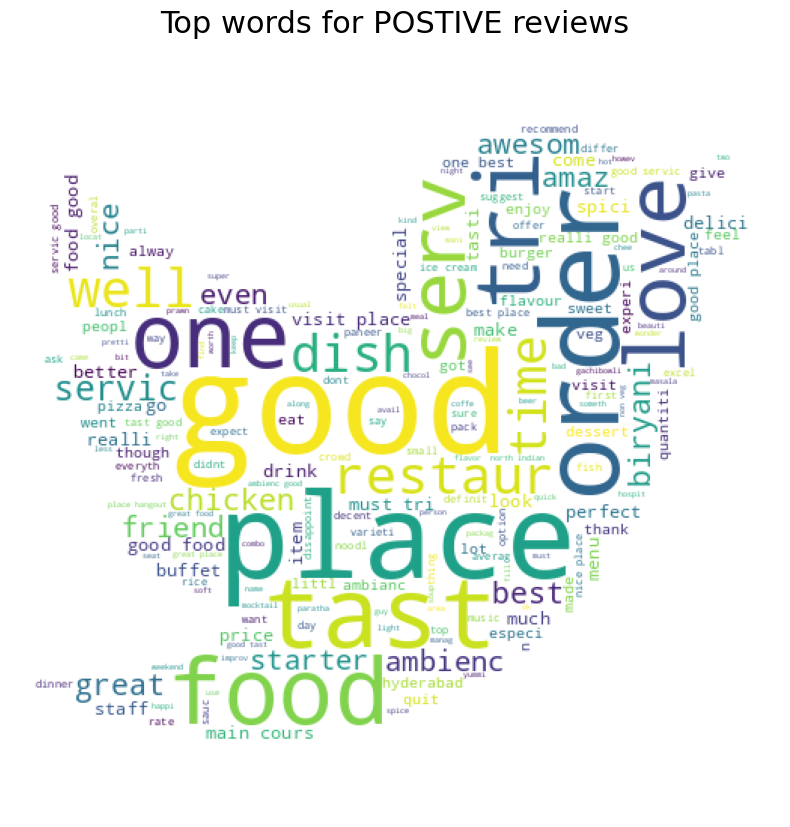

In [24]:
twitter_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/COM6101/twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in df.loc[df['Rating_encoded'] == 1, 'Review_clean']))
plt.figure(figsize=(18,10))
plt.title('Top words for POSTIVE reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

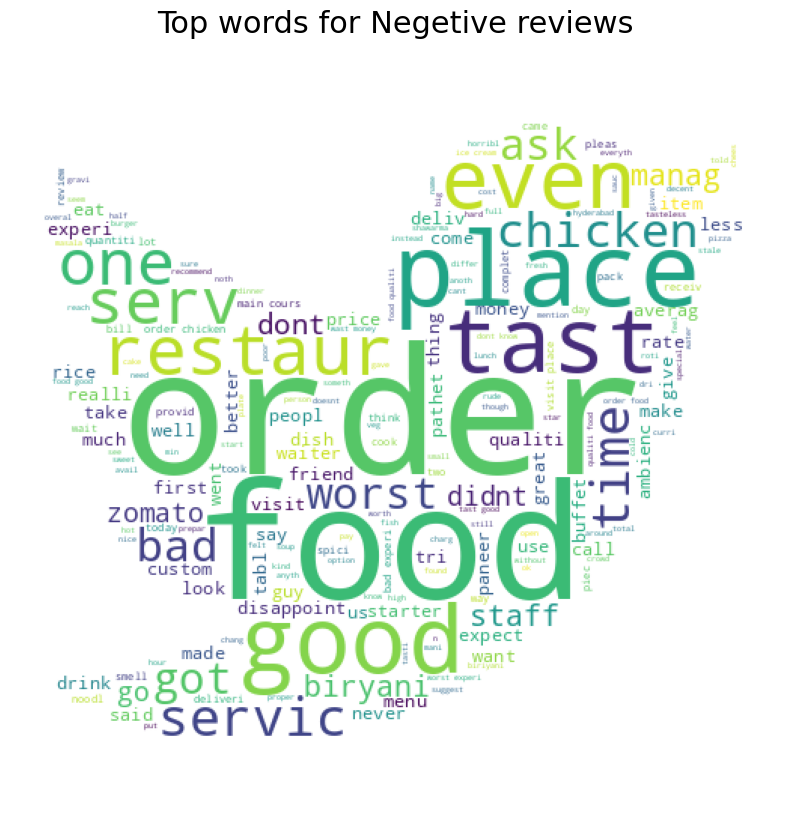

In [25]:
twitter_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/COM6101/twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in df.loc[df['Rating_encoded'] == 0, "Review_clean"]))
plt.figure(figsize=(18,10))
plt.title('Top words for Negetive reviews',
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

Vectorization

In [26]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
x = df['Review_clean']
y = df['Rating_encoded']

print(len(x), len(y))

9954 9954


In [27]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

7465 7465
2489 2489


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [29]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

Tunning CountVectorizer

In [30]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2),
                              min_df=0.1, max_df=0.7, max_features=100)

TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<7465x16802 sparse matrix of type '<class 'numpy.float64'>'
	with 170923 stored elements in Compressed Sparse Row format>

Word Embeddings: GloVe

In [32]:
texts = df['Review_clean']
target = df['Rating_encoded']

In [33]:
# Calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

21241

Pad_sequences

In [34]:
sequence = [[1], [2, 3], [4, 5, 6]]
tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')

array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]], dtype=int32)

In [35]:
tf.keras.preprocessing.sequence.pad_sequences(
    sequence, maxlen=None, dtype='int32', padding='pre',
    truncating='pre', value=0.0
)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]], dtype=int32)

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
def embed(corpus):
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts),
    length_long_sentence,
    padding='post'
)

train_padded_sentences

array([[ 15,   1,   3, ...,   0,   0,   0],
       [ 15,   1, 533, ...,   0,   0,   0],
       [ 34,  10,  12, ...,   0,   0,   0],
       ...,
       [ 47, 124,  57, ...,   0,   0,   0],
       [153,  21, 375, ...,   0,   0,   0],
       [394,  10,  59, ...,   0,   0,   0]], dtype=int32)

GloVe

In [38]:
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary

In [39]:
# Now we will load embedding vectors of those words that appear in the
# Glove dictionary. Others will be initialized to 0.

embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.030769  ,  0.11993   ,  0.53908998, ..., -0.52877998,
         0.17584001,  1.06500006],
       [-0.24506   ,  0.04481   ,  0.32789999, ...,  0.16635001,
         0.40259001,  0.3766    ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Modeling

In [40]:
import plotly.figure_factory as ff

x_axes = ['positive', 'negative']
y_axes =  ['negative', 'positive']

def conf_matrix(z, x=x_axes, y=y_axes):

    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True

    return fig

In [41]:
# Create a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

Naive Bayes DTM

In [42]:
# Make class anf probability predictions
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [43]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.8899156287665729


In [44]:
# Calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9252095639070782

Naive Bayes

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                 ('tfid', TfidfTransformer()),
                 ('model', MultinomialNB())])

In [46]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.7934913619927682


XGBoost

In [47]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

In [48]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Train: 0.9225720026791695
Test: 0.8754519887505022


LSTM

In [49]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences,
    target,
    test_size=0.25
)

In [50]:

def glove_lstm():
    model = Sequential()

    model.add(Embedding(
        input_dim=embedding_matrix.shape[0],
        output_dim=embedding_matrix.shape[1],
        weights = [embedding_matrix],
        input_length=length_long_sentence
    ))

    model.add(Bidirectional(LSTM(
        length_long_sentence,
        return_sequences = True,
        recurrent_dropout=0.2
    )))

    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 539, 100)          2124100   
                                                                 
 bidirectional (Bidirection  (None, 539, 1078)         2759680   
 al)                                                             
                                                                 
 global_max_pooling1d (Glob  (None, 1078)              0         
 alMaxPooling1D)                                                 
                                                                 
 batch_normalization (Batch  (None, 1078)              4312      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1078)              0         
                                                        

In [53]:
# Load the model and train

#model = glove_lstm()

#checkpoint = ModelCheckpoint(
#    'model.h5',
#    monitor = 'val_loss',
#    verbose = 1,
#    save_best_only = True
#)
#reduce_lr = ReduceLROnPlateau(
#    monitor = 'val_loss',
#    factor = 0.2,
#    verbose = 1,
#    patience = 5,
#    min_lr = 0.001
#)
#history = model.fit(
#    X_train,
#    y_train,
#    epochs = 7,
#    batch_size = 32,
#    validation_data = (X_test, y_test),
#    verbose = 1,
#    callbacks = [reduce_lr, checkpoint]
#)

Epoch 1/7
  2/234 [..............................] - ETA: 1:43:56 - loss: 1.5454 - accuracy: 0.5625

KeyboardInterrupt: 

In [51]:
# load the model
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model.h5')

In [61]:
ls ../input/finetune-of-tensorflow-bilstm-eda-about/

ls: cannot access '../input/finetune-of-tensorflow-bilstm-eda-about/': No such file or directory


In [62]:
# 获取模型层的权重
weights = model.get_weights()

# 打印每一层的权重信息
for i in range(len(weights)):
    print("Layer", i+1, "weights shape:", weights[i].shape)

Layer 1 weights shape: (21241, 100)
Layer 2 weights shape: (100, 2156)
Layer 3 weights shape: (539, 2156)
Layer 4 weights shape: (2156,)
Layer 5 weights shape: (100, 2156)
Layer 6 weights shape: (539, 2156)
Layer 7 weights shape: (2156,)
Layer 8 weights shape: (1078,)
Layer 9 weights shape: (1078,)
Layer 10 weights shape: (1078,)
Layer 11 weights shape: (1078,)
Layer 12 weights shape: (1078, 539)
Layer 13 weights shape: (539,)
Layer 14 weights shape: (539, 539)
Layer 15 weights shape: (539,)
Layer 16 weights shape: (539, 1)
Layer 17 weights shape: (1,)


In [65]:
index_word_reverse = {index: word for word, index in word_tokenizer.word_index.items()}

In [94]:
import numpy as np

# 计算每个词的重要性
feature_importance = np.sum(np.abs(embedding_matrix), axis=1)

# 打印前几个具有最大重要性的词
num_top_features = 10
top_indices = np.argsort(feature_importance)[::-1][:num_top_features]
top_features = [index_word_reverse[i] for i in top_indices]

print("Top", num_top_features, "features:")
for i, feature in enumerate(top_features, 1):
    print(i, ":", feature)

Top 10 features:
1 : herein
2 : meh
3 : duh
4 : nah
5 : sensex
6 : mee
7 : uh
8 : fri
9 : toh
10 : de


In [78]:
feature

'sensex'

In [69]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [98]:
import chardet

with open("新建文本文档.txt", "rb") as file:
    rawdata = file.read()
    encoding = chardet.detect(rawdata)['encoding']

print("Detected encoding:", encoding)

with open("新建文本文档.txt", "r", encoding=encoding) as file:
    document = file.read()

Detected encoding: MacRoman


In [103]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# 初始化 WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# 读取文档内容
with open("新建文本文档.txt", "r", encoding=encoding) as file:
    document = file.read()

# 分词
tokens = word_tokenize(document)

# 对每个词进行词形还原
lemmatized_words = lemmatizer.lemmatize("toh")

# 输出词形还原后的词
print("Lemmatized words:", lemmatized_words)

Lemmatized words: toh


In [106]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

# 加载预训练的GPT模型和tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# 定义起始文本
prompt_text = "de"

# 将起始文本转换为模型的输入
input_ids = tokenizer.encode(prompt_text, return_tensors='pt')

# 生成文本
with torch.no_grad():
    outputs = model.generate(input_ids, max_length=50, num_return_sequences=1)

# 解码生成的文本
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# 打印生成的文本
print("Generated text:", generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated text: de.

The first of the two new buildings will be built on the site of the former home of the former mayor of the city of St. Louis, Louis, and will be the first of its kind in the city.

The
